In [1]:
from facebook_scraper import get_posts

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
from bs4 import BeautifulSoup

import csv

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
read_file = pd.read_csv('personal.csv', error_bad_lines=False , sep=";" ,encoding='utf-8' )


df = read_file.to_string()
df_split = df.split()
df_split

['🪁15%',
 'dto',
 'en',
 'la',
 'Tienda',
 'Online',
 'de',
 'Linda',
 'de',
 'Alma',
 '0',
 '🪁10%',
 'dto',
 'en',
 'la',
 'Tienda',
 'Online',
 'de',
 'Simones',
 'y',
 '20%',
 'dto',
 'en',
 'sus',
 'tiendas',
 'físicas',
 '1',
 '🪁25%',
 'dto',
 'en',
 'la',
 'Tienda',
 'Online',
 'de',
 'Style',
 'Store',
 '2',
 '📱',
 'Si',
 'todavía',
 'no',
 'sos',
 'parte',
 'de',
 '#ClubPersonal,',
 'descargate',
 'la',
 'app',
 'y',
 'descubrí',
 'todos',
 'los',
 'beneficios',
 'que',
 'tenemos',
 'para',
 'vos.',
 'Podés',
 'hacerlo',
 'acá:',
 'http://onelink.to/miappclub',
 '3',
 'A',
 'partir',
 'de',
 'ahora,',
 '¡podés',
 'acceder',
 'a',
 'un',
 '15%',
 'dto',
 'en',
 'la',
 'compra',
 'de',
 'media',
 'docena',
 'o',
 'docenas',
 'de',
 'empanadas',
 'tentación!',
 '4',
 '📱',
 'Si',
 'todavía',
 'no',
 'sos',
 'parte',
 'de',
 '#ClubPersonal,',
 'descargate',
 'la',
 'app',
 'y',
 'descubrí',
 'todos',
 'los',
 'beneficios',
 'que',
 'tenemos',
 'para',
 'vos.',
 'Podés',
 'hacerlo',


In [24]:
read_file.tail(10)

,textos,emoji,urlcount
699,Reencuentro Piraña gracias #GIGASCompartidos. ...,[],1
700,¡Recibí factura mail mirala sólo click! ingres...,[],1
701,Compartí vos historia Piraña #GIGASCompartidos...,[],1
702,HOY triplicá recargas. ¡No pierdas! http://bit...,[],1
703,Ahora podés compartir gigas familia decidir ca...,[],1
704,¡Renovamos APP Mi Cuenta Personal! Más funcion...,[],1
705,"¡Esta navidad regalar fácil, comprá moverte si...",[],1
706,Conocé consumos mes. Ingresá Mi Cuenta web App...,[],1
707,¿Ya tenés Protección Personal? Asegurá equipo ...,[],1
708,¡Navidad descuentos! #ClubPersonal da 20%dto. ...,[],1


In [4]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
read_file = read_file.rename(columns={'Por razones de público conocimiento la nueva fecha para la transmisión del #BSASTRAP es el Jueves 3 de Diciembre a las 20 hs 🇦🇷 en el canal de #Youtube de /MovistarArg': 'textos'})

In [9]:


read_file = read_file.rename(columns={'🪁15% dto en la Tienda Online de Linda de Alma': 'textos'})



In [10]:
read_file['textos'] = read_file['textos'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words ('spanish')])   )

In [11]:
from wordcloud import WordCloud

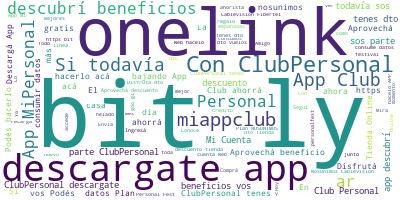

In [16]:
long_string = ','.join(list(read_file['textos'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

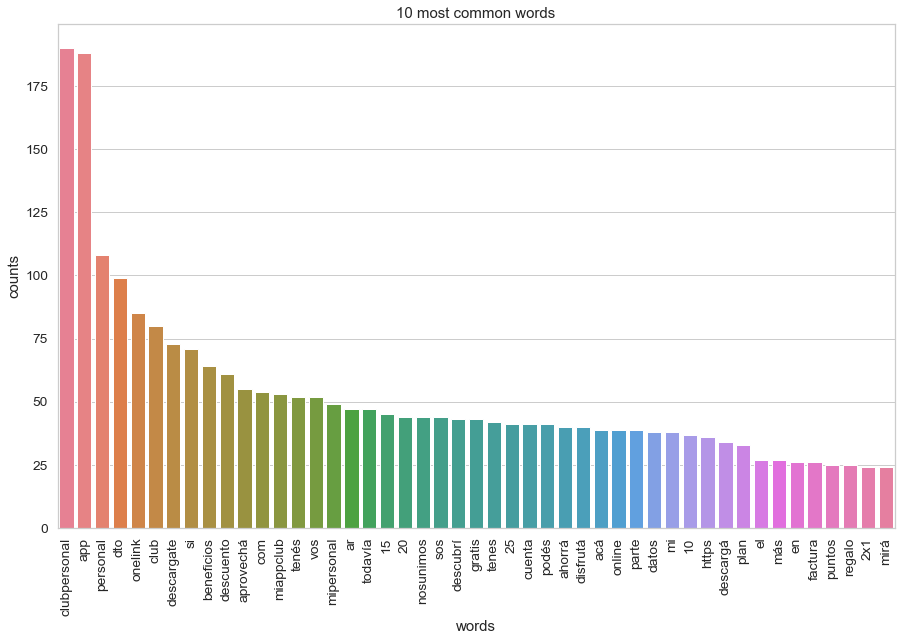

In [19]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_50_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[3:50]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(read_file['textos'])

# Visualise the 50 most common words
plot_50_most_common_words(count_data, count_vectorizer)

In [20]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
cuenta ly bit mi app http mirá clubpersonal gl goo

Topic #1:
crédito casa fácil la tarjeta empanadas 24 https comprá cómo

Topic #2:
http ly bit clubpersonal si tenés puntos 10 gratis personal

Topic #3:
app mipersonal descargá gratis clubpersonal comprá descuento aprovechá seguí navegando

Topic #4:
ly bit http personal gigas tenés equipo ya total protección

Topic #5:
dto clubpersonal tenes 15 gratis datos ahora plan consume descargala

Topic #6:
http clubpersonal app onelink bit ly dto beneficios miappclub descargate

Topic #7:
club app ahorrá descargate descuento clubpersonal mipersonal descargá 20 https

Topic #8:
com ar nosunimos personal www https ly bit fibertel cablevisión

Topic #9:
personal fest online bit ly descuento dto yomequedoencasa accedé 10


In [21]:
import emoji
from collections import Counter

In [22]:
def split_count(textos):

    emoji_list = []
    data = textos
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

total_mensajes = read_file.shape[0]
media_mensajes = read_file[read_file['textos'] == 'textos'].shape[0]
read_file["emoji"] =read_file["textos"].apply(split_count)
emojis = sum(read_file['emoji'].str.len())
URLPATTERN = r'(https?://\S+)'
read_file['urlcount'] = read_file.textos.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(read_file.urlcount)

In [23]:
total_emojis_list = list([a for b in read_file.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
agregados_emoji = emoji_df[(emoji_df['emoji'] == '♀')|(emoji_df['emoji'] == '🏻')]
emoji_df.drop(agregados_emoji.index, inplace=True)
emoji_df = emoji_df.head(10)
emoji_df

,emoji,count
0,👉,81
1,📱,26
2,🤩,10
3,🙌,9
4,🎉,7
5,🏠,7
6,⭐,6
7,😉,6
8,👏,5
9,🤳,5


In [ ]:
stop_words = set(stopwords.words('spanish'))
stop_words.update(["Movistar","DNI finalizado", "Horarios locales","Podés hacer","Trámites operaciones","También podes","Conocé horarios","Movistar Play","Canal Youtube","show","ar","Movistar Arena","desde casa","sisi"])